In [141]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [142]:
cars = pd.read_csv('Cars.csv')

In [143]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [144]:
cars.shape

(81, 5)

In [145]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [146]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [147]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


/var/folders/5b/vf5hrqmd0z7_801v82j5pb680000gn/T/ipykernel_49959/183442867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['MPG'])


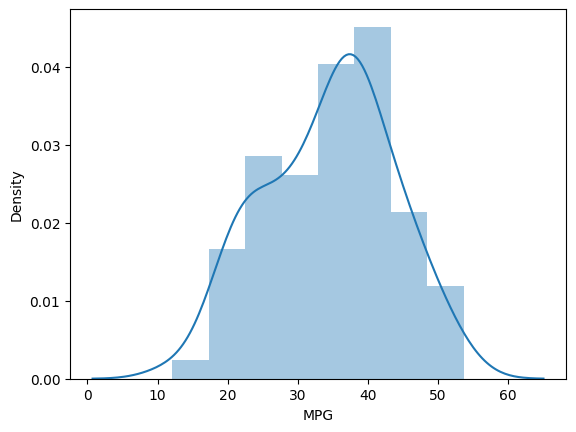

In [148]:
# upgraded version of histogram
sns.distplot(cars['MPG'])
plt.show()

# assumption 1: Linearity test 

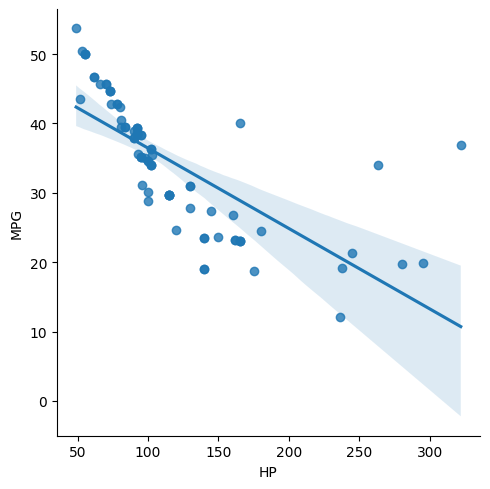

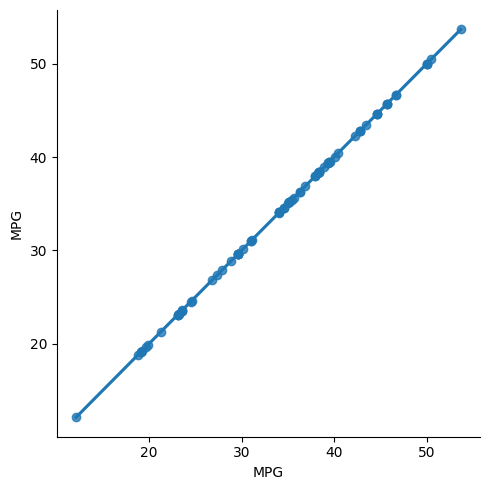

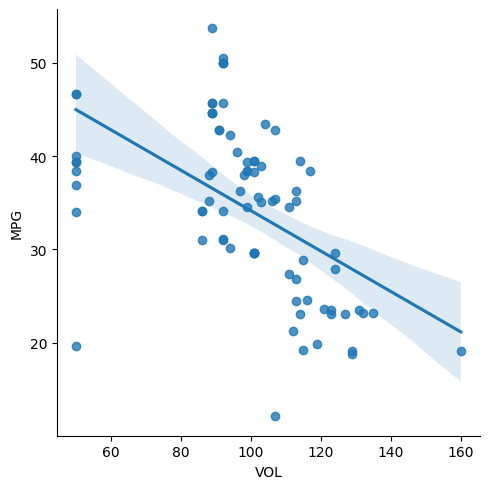

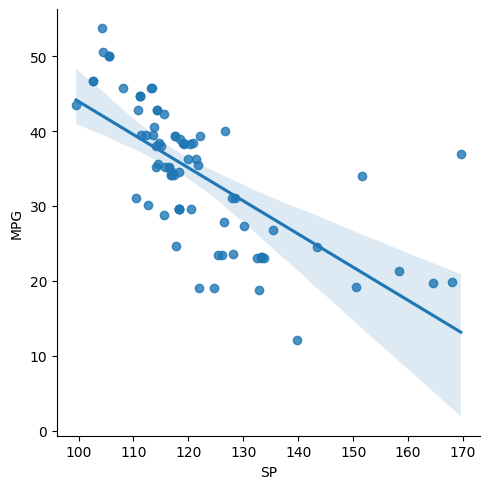

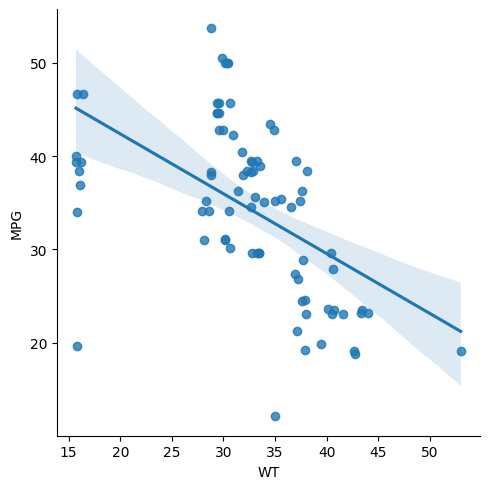

In [149]:
# doing scatter plot for all the features using loops
# lmplot is modified version of scatter plot
for i in cars.columns:
    sns.lmplot(data = cars, x = i,y = 'MPG')

## Linearity test failed coz there's no such relationaship b/w them

# Assumption 2: No MultiCollinearity test

In [150]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


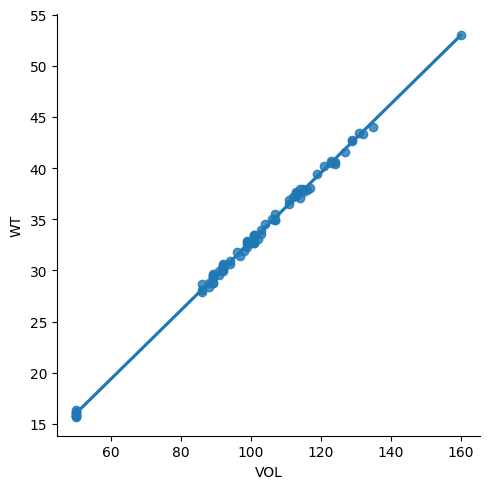

In [151]:
# where the corr() states that VOL and WT has very strong realtionship
sns.lmplot(data = cars,x= 'VOL',y='WT')

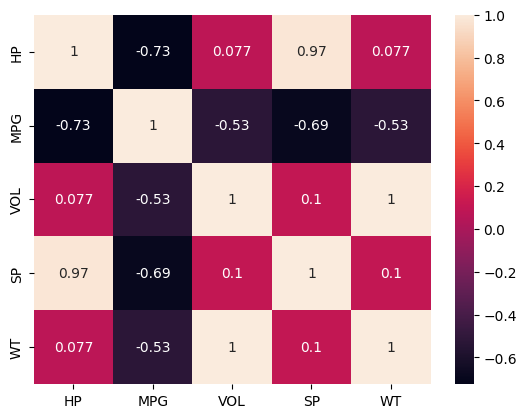

In [152]:
sns.heatmap(data = cars.corr(),annot = True)
plt.show()

we can able to say that HP and SP has very high correlation b/w them and VOL and WT has very strong relationship amoung them
-> so these relationship will affect the model performance

## Therefore the no MultiCollinearity also fails

# assumption 3: No auto regression data(no time dependent data)

In [153]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## There is no time dependent present in the data

## Therefore No Auto Regression is pass

Importing Linear Regression algorithm

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

# Data prepartion(sperating x and y)


In [155]:
x = cars.drop(labels = 'MPG',axis = 1)

In [156]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [157]:
y = cars['MPG']

In [158]:
type(y)

pandas.core.series.Series

# Model building

In [159]:
model = LinearRegression()

In [160]:
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [161]:
model.intercept_

np.float64(30.677335852151653)

In [162]:
model.coef_

array([-0.20544372, -0.33605084,  0.39562692,  0.40057409])

In [163]:
y_pred = model.predict(x)

In [164]:
y_pred

array([43.44193477, 42.38879289, 42.27934147, 42.53835981, 42.17264802,
       43.02061916, 42.32536062, 48.07621852, 48.28120247, 40.79122814,
       41.52153227, 47.80956747, 39.95980269, 41.52757889, 41.76632332,
       41.6181448 , 41.15094046, 47.98605515, 41.30861046, 37.87127922,
       38.57706414, 37.35199705, 37.89770285, 39.5625144 , 39.93380662,
       46.73870908, 35.48165898, 38.78152504, 38.24861192, 36.00285298,
       34.84603989, 37.21630246, 37.13919796, 34.82541399, 37.22361389,
       37.53950097, 39.27144845, 38.24219888, 38.54286458, 35.9391722 ,
       34.2129755 , 35.36313259, 37.50473376, 38.07998482, 35.79651664,
       36.2613377 , 34.21826465, 35.59393404, 36.91805291, 33.31108154,
       33.21313413, 33.3023649 , 29.19864884, 27.52358579, 28.3207133 ,
       28.56722621, 35.81583602, 33.02108459, 35.37334971, 32.29909503,
       29.87685849, 28.76093817, 25.14188416, 26.47040896, 25.97651933,
       36.35652478, 26.0975912 , 23.6416178 , 24.39887199, 20.21

In [165]:
mean_absolute_error(cars['MPG'],y_pred)

3.267968285420799

In [166]:
r2_score(cars['MPG'],y_pred)

0.7705372737359844

## Homoscadascity check

In [167]:
errors = y - y_pred

In [168]:
errors

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Name: MPG, Length: 81, dtype: float64

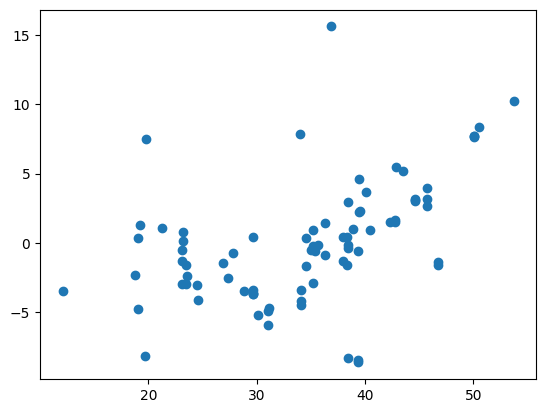

In [169]:
plt.scatter(x= cars['MPG'],y = errors)
plt.show()

## The data is spread over all the areas so the homoscadascity is failed

## the variance(spread) is all over the range so the homoscadascity is failed

## Zero residual error

## All the points should fit on the line

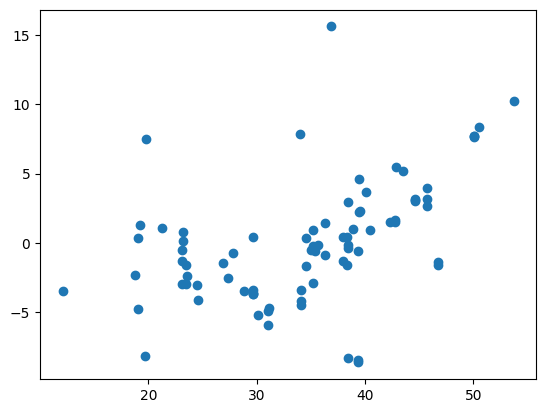

In [170]:
plt.scatter(x= cars['MPG'],y=errors)

## here the model is underperformed so we can come to know that the datapoints are not in model line

# Day 2

# Stats model

In [171]:
!python3 -m pip install statsmodels


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [172]:
import statsmodels.formula.api as smf

In [173]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# AIC

## The Akaike information criterion (AIC) is a metric used to compare the fit of different regression models.

## The lower the AIC, the better the model fit.

# BIC

## The Bayesian Information Criterion (BIC) is a metric used to compare the goodness of fit of different regression models.

## A lower BIC indicates a better balance between model fit and complexity




# rsquared

## coefficient of determination

## RSS = sum of squares of residuals

## TSS = total sum of squares

## The Higher the rsquared, the better the model fit.

# Adjusted R-squared

## is a modified version of R-squared that adjusts for predictors that are not significant in a regression model.

## A lower adjusted R-squared indicates that the additional input variables are not adding value to the model.

## The Higher the rsquared_adj, the better the model fit.

In [174]:
model_1 = smf.ols(formula = 'MPG~HP',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 530.7452702659343
BIC 535.5341685752792
R-squared 0.5256806086282022
Adjusted R-squared 0.5196765656994453


In [175]:
model_1 = smf.ols(formula = 'MPG~SP',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 539.408199092848
BIC 544.1970974021929
R-squared 0.4721402334141218
Adjusted R-squared 0.46545846421683224


In [176]:
model_1 = smf.ols(formula = 'MPG~WT',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 564.8358142145094
BIC 569.6247125238542
R-squared 0.2774751389270127
Adjusted R-squared 0.2683292546096331


In [177]:
model_1 = smf.ols(formula = 'MPG~VOL',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 564.5634161305575
BIC 569.3523144399023
R-squared 0.27990086511227064
Adjusted R-squared 0.27078568618964105


In [178]:
model_F1 = smf.ols(formula = 'MPG~HP+SP+WT+VOL',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 564.5634161305575
BIC 569.3523144399023
R-squared 0.27990086511227064
Adjusted R-squared 0.27078568618964105


In [179]:
model_1 = smf.ols(formula = 'MPG~HP+SP',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 531.5481466080848
BIC 538.7314940721021
R-squared 0.5326391712851648
Adjusted R-squared 0.5206555602924767


In [180]:
model_1 = smf.ols(formula = 'MPG~HP+WT',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 481.16318962229695
BIC 488.34653708631424
R-squared 0.7490973272857682
Adjusted R-squared 0.7426639254213008


In [181]:
model_1 = smf.ols(formula = 'MPG~HP+VOL',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 480.65692370523766
BIC 487.84027116925495
R-squared 0.7506606277376423
Adjusted R-squared 0.744267310500146


In [182]:
model_1 = smf.ols(formula = 'MPG~SP+WT',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 500.2002027768268
BIC 507.3835502408441
R-squared 0.6826231212746164
Adjusted R-squared 0.6744852525893502


In [183]:
model_1 = smf.ols(formula = 'MPG~SP+VOL',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 499.6151150749222
BIC 506.7984625389395
R-squared 0.6849073714078721
Adjusted R-squared 0.6768280732388432


In [184]:
model_1 = smf.ols(formula = 'MPG~SP+WT+VOL',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 500.9002336057836
BIC 510.4780302244734
R-squared 0.6876760478006352
Adjusted R-squared 0.6755075821305301


In [185]:
model_1 = smf.ols(formula = 'MPG~WT+VOL',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 566.3145901819738
BIC 573.4979376459911
R-squared 0.282109561644598
Adjusted R-squared 0.2637021145072801


In [186]:
model_1 = smf.ols(formula = 'MPG~HP+SP+WT',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 476.2992750152977
BIC 485.8770716339875
R-squared 0.7694828139983457
Adjusted R-squared 0.7605016249333463


## 0.7694828139983457 is almost same accuracy as linear regression we trained earlier but not good accuracy for that we need to do certain techniques to improve accuracy. 

## The techniques are follows:

# Data transformation techniques for continous data

Log Transformation

Square root Transformation

Cube Root Transformation

Reciprocal Transformation

Boxcox Transformation

Standard Scaler

Min Max Scaler

Roubust Scaler


# Data transformation techniques for Discrete data

Label Encoding

One Hot Encoding


In [187]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [188]:
# we are making copy of cars dataframe
# We can perform any transformation in this copy df and without making any changes in main df
cars_df = cars.copy()

In [189]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [190]:
# Applying log transformation in cars_df

cars_df['log_HP'] = np.log(cars_df['HP'])

In [191]:
cars_df['log_VOL'] = np.log(cars_df['VOL'])

In [192]:
cars_df['log_SP'] = np.log(cars_df['SP'])

In [193]:
cars_df['log_WT'] = np.log(cars_df['WT'])

In [194]:
cars_df

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


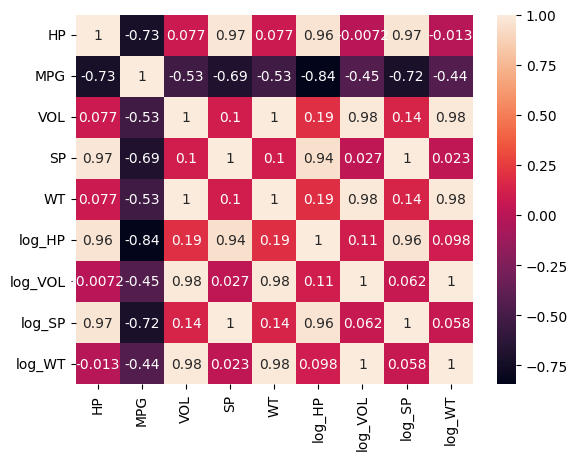

In [195]:
sns.heatmap(data = cars_df.corr(),annot = True)
plt.show()

In [203]:
# initially r2 was 52
model_1 = smf.ols(formula = 'MPG~HP',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 530.7452702659343
BIC 535.5341685752792
R-squared 0.5256806086282022
Adjusted R-squared 0.5196765656994453


In [204]:
# initially r2 was 52
model_2 = smf.ols(formula = 'MPG~log_HP',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 490.49860857307215
BIC 495.287506882417
R-squared 0.7114095515436409
Adjusted R-squared 0.7077565078922946


In [205]:
model_1 = smf.ols(formula = 'MPG~WT',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 564.8358142145094
BIC 569.6247125238542
R-squared 0.2774751389270127
Adjusted R-squared 0.2683292546096331


In [206]:
#initially r2 was 27
model_2 = smf.ols(formula = 'MPG~log_WT',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 573.689208547852
BIC 578.4781068571968
R-squared 0.19402478308187288
Adjusted R-squared 0.18382256514620032


In [207]:
model_1 = smf.ols(formula = 'MPG~SP',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 539.408199092848
BIC 544.1970974021929
R-squared 0.4721402334141218
Adjusted R-squared 0.46545846421683224


In [208]:
model_2 = smf.ols(formula = 'MPG~log_SP',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 532.1442469181513
BIC 536.9331452274962
R-squared 0.5174173348052116
Adjusted R-squared 0.511308693473632


In [209]:
model_1 = smf.ols(formula = 'MPG~VOL',data = cars).fit()

print('AIC',model_1.aic)

print('BIC',model_1.bic)

print('R-squared',model_1.rsquared)

print('Adjusted R-squared',model_1.rsquared_adj)

AIC 564.5634161305575
BIC 569.3523144399023
R-squared 0.27990086511227064
Adjusted R-squared 0.27078568618964105


In [213]:
model_2 = smf.ols(formula = 'MPG~log_VOL',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 573.0814921857461
BIC 577.870390495091
R-squared 0.20004912250114715
Adjusted R-squared 0.18992316202647808


In [211]:
model_2 = smf.ols(formula = 'MPG~log_HP+log_SP+WT+VOL',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 400.50133505038735
BIC 412.47358082374956
R-squared 0.9117779418023274
Adjusted R-squared 0.9071346755813973


# Day 3

## now we are selecting the high performing features together

In [216]:
model_2 = smf.ols(formula = 'MPG~log_HP+log_SP',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 459.5114665889197
BIC 466.694814052937
R-squared 0.8079492071396546
Adjusted R-squared 0.8030248278355432


In [217]:
model_2 = smf.ols(formula = 'MPG~log_HP+log_SP+WT',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 396.2763347861735
BIC 405.85413140486327
R-squared 0.9141683443323988
Adjusted R-squared 0.910824253851843


In [223]:
model_2 = smf.ols(formula = 'MPG~log_HP+log_SP+WT+VOL',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 397.9193753799126
BIC 409.8916211532748
R-squared 0.9145457641545164
Adjusted R-squared 0.9100481727942278


In [221]:
model_2 = smf.ols(formula = 'MPG~log_HP+log_SP+VOL',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 396.92283101805924
BIC 406.500627636749
R-squared 0.9134805433870518
Adjusted R-squared 0.9101096554670668


In [225]:
model_f2 = smf.ols(formula = 'MPG~log_HP+log_SP+WT+VOL',data = cars_df).fit()

print('AIC',model_2.aic)

print('BIC',model_2.bic)

print('R-squared',model_2.rsquared)

print('Adjusted R-squared',model_2.rsquared_adj)

AIC 397.9193753799126
BIC 409.8916211532748
R-squared 0.9145457641545164
Adjusted R-squared 0.9100481727942278


In [226]:
y_pred_model = model_f2.predict()

In [227]:
y_pred_model

array([52.98807605, 48.63534594, 48.91187864, 45.36001677, 49.82758114,
       45.61861841, 48.79560971, 48.49185073, 47.97395189, 42.11551032,
       42.97339582, 44.78514928, 40.32749776, 42.95811883, 44.53422204,
       42.72930103, 42.97339379, 44.33924724, 42.57503526, 38.91069198,
       38.92062991, 40.28266024, 38.56952434, 39.93484881, 39.37330017,
       42.51647995, 37.81746995, 38.4040526 , 44.62774889, 34.94157232,
       36.77243696, 37.18129547, 36.27174894, 34.17969832, 38.34821221,
       37.25639198, 37.8107134 , 35.63974429, 34.88010233, 33.04887153,
       33.71131836, 34.26212766, 34.53661476, 36.27569368, 35.28186632,
       34.31792679, 33.54421823, 34.13999027, 33.5729486 , 29.60507664,
       29.85254404, 29.6270995 , 28.59927224, 26.37968313, 26.60967776,
       27.70196822, 32.41032483, 30.33776365, 32.36681058, 31.45532042,
       27.14067114, 26.25386234, 23.39678189, 24.02780847, 23.40315581,
       29.39569984, 23.30839308, 22.99321162, 23.08688016, 23.10

In [228]:
mean_absolute_error(cars['MPG'],y_pred_model)

1.5350963162120264

In [230]:
# Now the accuracy is 91.45 before it was 77

# Detecting Influencers/Outliers

Cooks Distance
High Influence Points
Cooks Distance Cook’s distance, is used in Regression Analysis to find influential outliers in a set of independent variables.
In other words, it’s a way to identify points that negatively affect your regression model.

The measurement is a combination of each observation’s leverage and residual values.

The higher the leverage and residuals, the higher the Cook’s distance.

Several interpretations for Cook’s distance exist. There isn’t a universally accepted rule for cut off points.

If you have a lot of points with large Cook's Distance values, that could indicate a problem with your regression model in general.

# Cook's distance

In [231]:
model_f_outliers = model_f2.get_influence()

In [232]:
dis,_ = model_f_outliers.cooks_distance

In [233]:
dis

array([2.02339191e-03, 3.77410760e-03, 2.02991098e-03, 2.56728135e-04,
       1.06267354e-03, 1.24292956e-05, 2.54341476e-03, 1.09180668e-02,
       6.57386006e-03, 2.81675433e-05, 2.47739464e-03, 7.86948404e-02,
       1.51711157e-03, 2.60079082e-03, 1.46459678e-03, 5.84961707e-03,
       4.05695024e-05, 5.86416796e-02, 3.62258766e-05, 9.81361297e-08,
       2.05740226e-04, 7.41160118e-03, 1.30414252e-04, 2.88550046e-04,
       1.25548657e-03, 4.36071812e-02, 1.03352766e-03, 4.77482776e-08,
       2.82574686e-03, 2.22018829e-04, 1.29488222e-02, 2.79412575e-03,
       2.27900350e-07, 5.24935318e-03, 2.06097951e-03, 3.21622940e-04,
       1.22699854e-05, 2.11039169e-03, 1.33026182e-03, 2.15769228e-03,
       1.49638019e-03, 4.99286930e-04, 2.67684119e-04, 1.93002293e-03,
       1.57094199e-04, 3.05493035e-05, 4.89915165e-04, 3.96318955e-04,
       3.93142603e-03, 9.41910132e-07, 4.90357932e-05, 1.16843416e-08,
       2.00390080e-03, 8.97895122e-03, 5.07707560e-05, 2.88855838e-05,
      

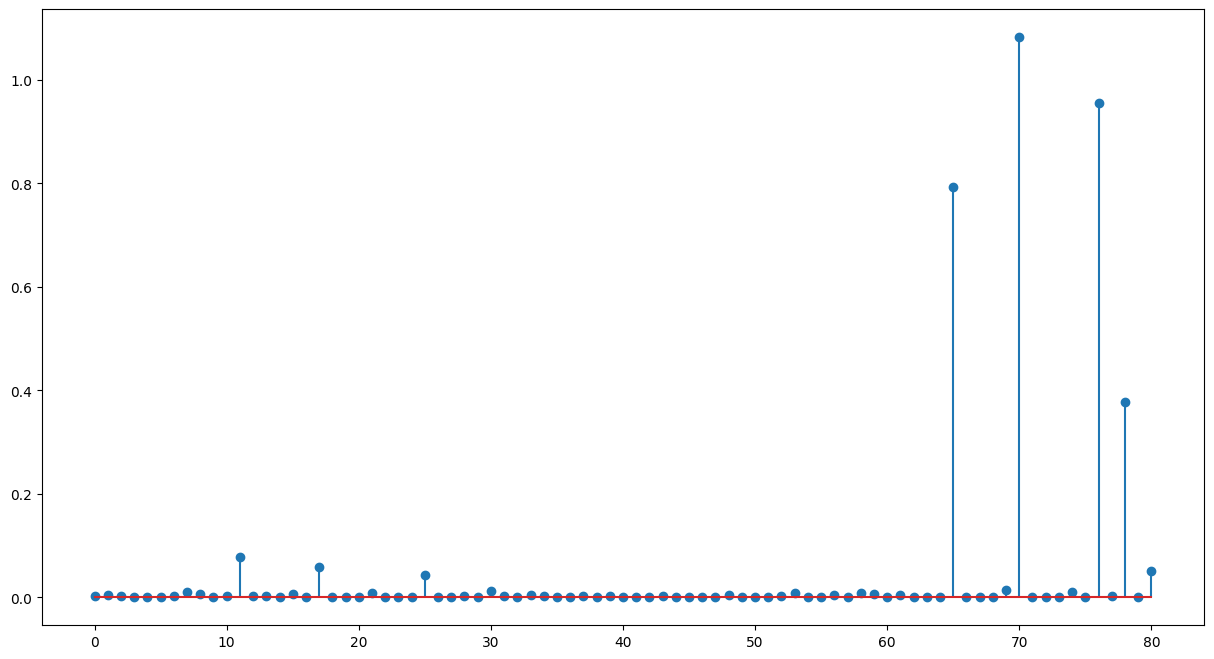

In [238]:
plt.figure(figsize=(15,8))
plt.stem(dis)
plt.show()

In [239]:
cars_df['dis'] = dis

In [240]:
cars_df

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT,dis
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.002023
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.003774
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002030
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000257
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.001063
...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,0.955048
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.001834
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,0.378361
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000280


In [241]:
cars_df.sort_values(by = 'dis', ascending= False)

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT,dis
70,280,19.678507,50,164.598513,15.823060,5.634790,3.912023,5.103509,2.761468,1.082382e+00
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,9.550477e-01
65,165,40.050000,50,126.598513,15.712859,5.105945,3.912023,4.841021,2.754479,7.925294e-01
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,3.783613e-01
11,92,39.354094,50,117.598513,15.753535,4.521789,3.912023,4.767276,2.757065,7.869484e-02
...,...,...,...,...,...,...,...,...,...,...
68,165,23.103172,123,133.312342,40.472042,5.105945,4.812184,4.892695,3.700611,2.797787e-07
32,102,36.285456,97,119.921115,31.380041,4.624973,4.574711,4.786834,3.446172,2.279004e-07
19,90,38.901834,103,118.472936,33.516974,4.499810,4.634729,4.774685,3.512052,9.813613e-08
27,92,38.411003,99,119.105055,32.835069,4.521789,4.595120,4.780006,3.491497,4.774828e-08


# influence plot

In [242]:
from statsmodels.graphics.regressionplots import influence_plot

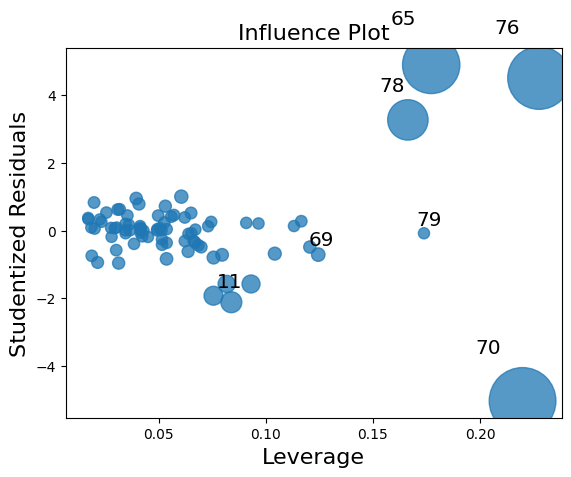

In [245]:
influence_plot(model_f2)
plt.show()

# removing the outliers rows

In [246]:
no_out = cars_df.drop(labels=[65,76,78,70])

In [247]:
no_out

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT,dis
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.002023
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.003774
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002030
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000257
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.001063
...,...,...,...,...,...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698,4.941642,4.859812,4.802907,3.752293,0.010474
75,175,18.762837,129,132.864163,42.778219,5.164786,4.859812,4.889327,3.756029,0.001290
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.001834
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000280


## training the model again with no_out data

In [252]:
model_f3 = smf.ols(formula = 'MPG~log_HP+log_SP+VOL',data = no_out).fit()

print('AIC',model_f3.aic)

print('BIC',model_f3.bic)

print('R-squared',model_f3.rsquared)

print('Adjusted R-squared',model_f3.rsquared_adj)

AIC 232.50088232418537
BIC 241.8761040116001
R-squared 0.9870260995889484
Adjusted R-squared 0.9864929255994531


In [254]:
y_pred_nod=model_f3.predict()

In [255]:
y_pred_nod

array([54.24839821, 50.29431005, 50.29431005, 46.57192861, 51.01188385,
       46.57796686, 50.29431005, 45.9816966 , 45.9816966 , 42.53369664,
       43.31420653, 41.32851179, 41.04478144, 43.31420653, 45.1450324 ,
       43.31420653, 42.84630688, 41.32851179, 42.84630688, 39.08288523,
       38.9147144 , 41.19811675, 38.29031799, 40.52108788, 38.35913562,
       39.11575389, 38.80956748, 38.9147144 , 46.83164239, 35.61187682,
       37.46890964, 37.49157382, 35.37093191, 35.27115926, 38.23108962,
       36.9025219 , 36.93010717, 33.97959598, 33.97959598, 31.57784411,
       34.61270268, 34.63830536, 33.95377845, 34.69190549, 34.78719461,
       34.01293186, 33.95806938, 34.09977086, 31.6382633 , 28.94560082,
       28.94560082, 28.94560082, 28.81867937, 26.02039008, 25.98052231,
       27.90745891, 31.20214108, 28.94560082, 31.04567379, 31.74384592,
       26.8556723 , 25.66086871, 24.09745393, 24.16821553, 23.35810871,
       22.77597659, 22.61568348, 22.66573971, 21.79867166, 22.63

In [256]:
mean_absolute_error(cars_df["MPG"],y_pred)

3.267968285420799

In [258]:
mean_absolute_error(cars_df["MPG"],y_pred_model)

1.5350963162120264

In [259]:
mean_absolute_error(no_out["MPG"],y_pred_nod)

0.807663435540959

In [261]:
errors

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Name: MPG, Length: 81, dtype: float64

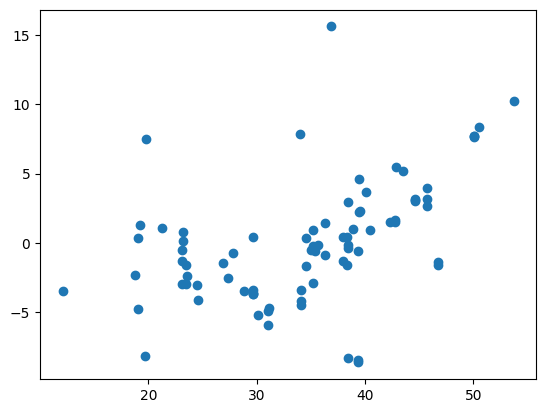

In [262]:
plt.scatter(x=cars_df['MPG'],y=errors)

In [263]:
error_1=no_out["MPG"]-y_pred_nod

In [264]:
error_1

0    -0.547717
1    -0.280909
2    -0.280909
3    -0.875606
4    -0.507652
        ...   
74   -2.263620
75   -0.749712
77    0.697231
79    1.159884
80   -0.987145
Name: MPG, Length: 77, dtype: float64

In [266]:
no_out["MPG"]

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
74    19.086341
75    18.762837
77    19.197888
79    19.833733
80    12.101263
Name: MPG, Length: 77, dtype: float64

In [267]:
y_pred_nod

array([54.24839821, 50.29431005, 50.29431005, 46.57192861, 51.01188385,
       46.57796686, 50.29431005, 45.9816966 , 45.9816966 , 42.53369664,
       43.31420653, 41.32851179, 41.04478144, 43.31420653, 45.1450324 ,
       43.31420653, 42.84630688, 41.32851179, 42.84630688, 39.08288523,
       38.9147144 , 41.19811675, 38.29031799, 40.52108788, 38.35913562,
       39.11575389, 38.80956748, 38.9147144 , 46.83164239, 35.61187682,
       37.46890964, 37.49157382, 35.37093191, 35.27115926, 38.23108962,
       36.9025219 , 36.93010717, 33.97959598, 33.97959598, 31.57784411,
       34.61270268, 34.63830536, 33.95377845, 34.69190549, 34.78719461,
       34.01293186, 33.95806938, 34.09977086, 31.6382633 , 28.94560082,
       28.94560082, 28.94560082, 28.81867937, 26.02039008, 25.98052231,
       27.90745891, 31.20214108, 28.94560082, 31.04567379, 31.74384592,
       26.8556723 , 25.66086871, 24.09745393, 24.16821553, 23.35810871,
       22.77597659, 22.61568348, 22.66573971, 21.79867166, 22.63

In [268]:
error_1

0    -0.547717
1    -0.280909
2    -0.280909
3    -0.875606
4    -0.507652
        ...   
74   -2.263620
75   -0.749712
77    0.697231
79    1.159884
80   -0.987145
Name: MPG, Length: 77, dtype: float64

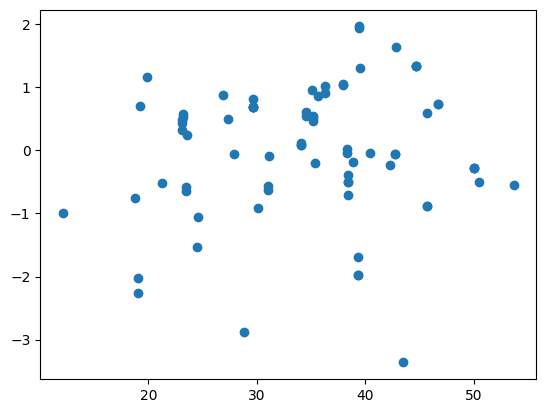

In [270]:
plt.scatter(x=no_out['MPG'],y=error_1)

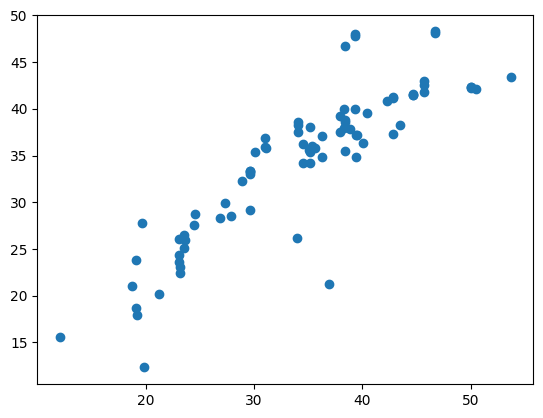

In [271]:
plt.scatter(x=y,y=y_pred)

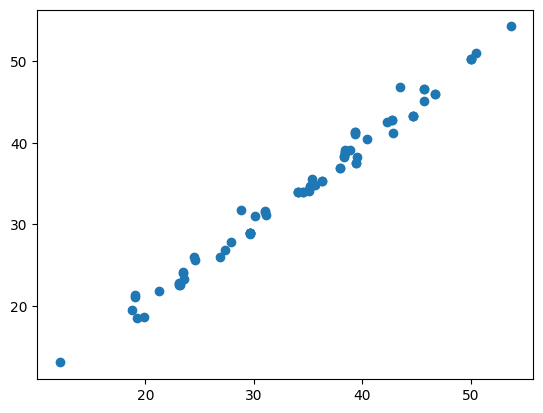

In [272]:
plt.scatter(x=no_out['MPG'],y=y_pred_nod)

In [273]:
import pickle

In [275]:
pickle.dump(model_f3, open('Linear_pickel.pkl','wb'))